In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
# 주가 데이터 불러오기
df = pd.read_csv('./data/train.csv')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
import xgboost as xgb
import lightgbm as lgb

def model_def():
    reg = LinearRegression(n_jobs=-1)
    ridge = Ridge(random_state = 42)
    lasso = Lasso(random_state=42)
    Enet = ElasticNet(random_state=42)
    DTree = DecisionTreeRegressor(random_state=42)
    rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    model_xgb = xgb.XGBRegressor(random_state=42, n_jobs=-1)
    model_lgb = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
    return [reg, ridge, lasso, Enet, DTree, rf, model_xgb, model_lgb]

LinearRegression
RMSE: 86.6564058244887


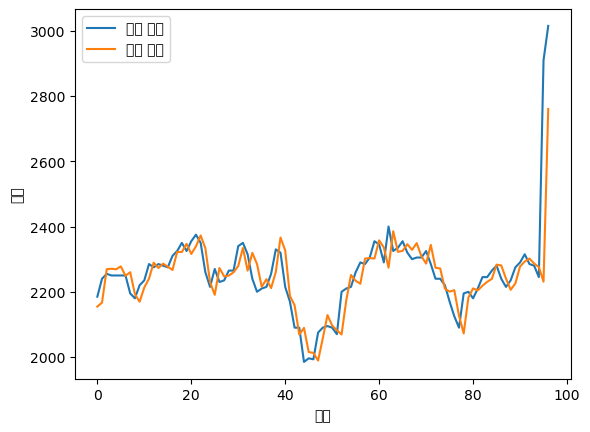

Ridge
RMSE: 85.89953267945444


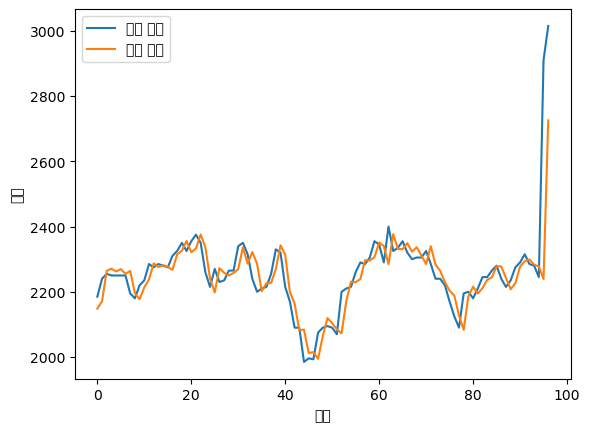

Lasso
RMSE: 885.8916631717781


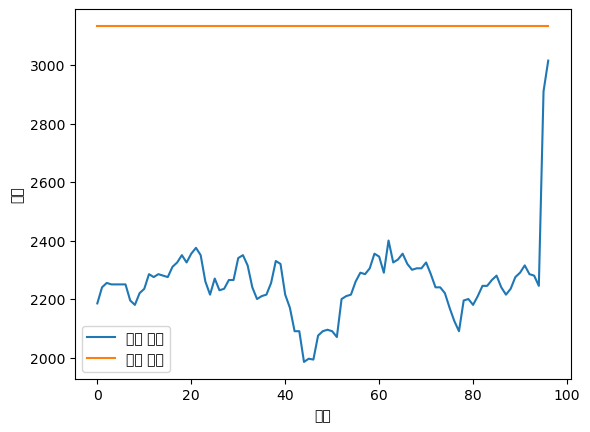

ElasticNet
RMSE: 484.9246168702344


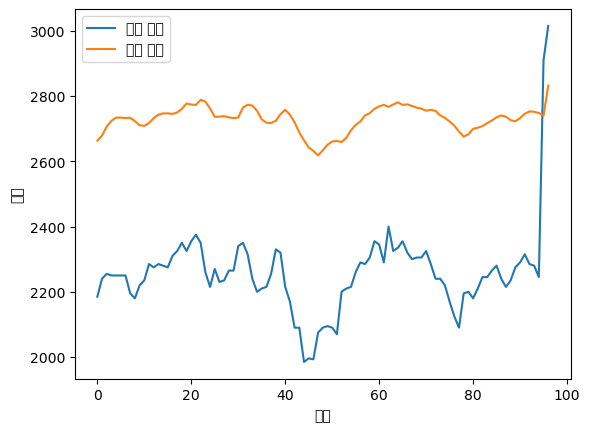

DecisionTreeRegressor
RMSE: 159.19514057754765


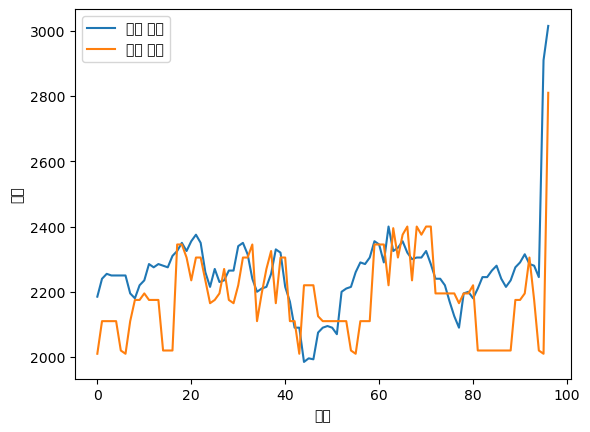

RandomForestRegressor
RMSE: 117.55912725969819


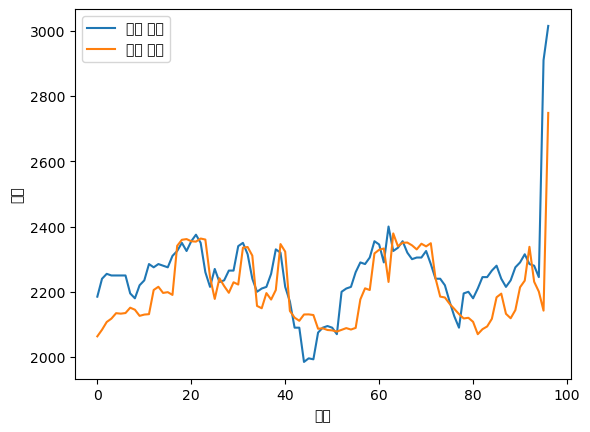

XGBRegressor
RMSE: 107.44171818941734


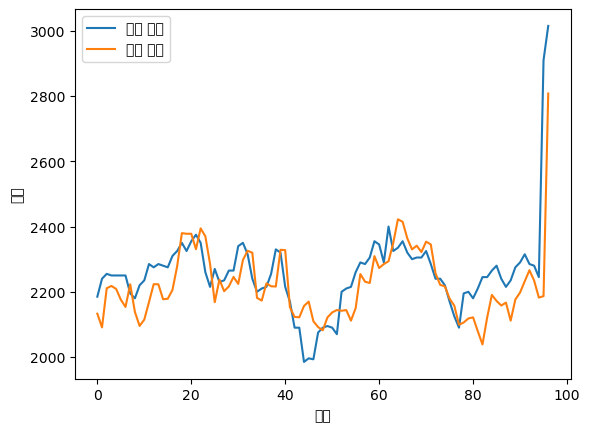

LGBMRegressor
RMSE: 136.8157671322082


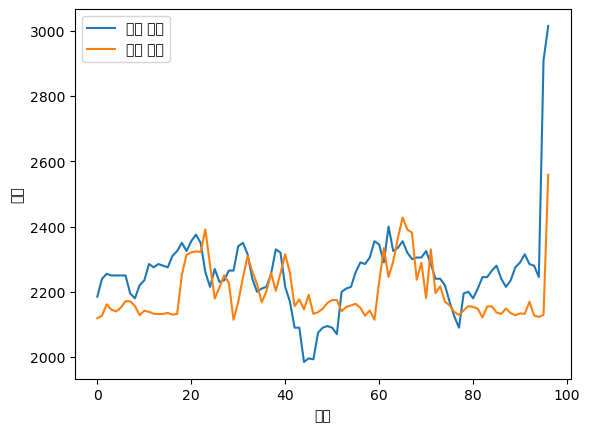

In [ ]:
# 주가 데이터에서 사용할 특징 선택
features = ['시가', '고가', '저가', '종가', '거래량']

# 주가 예측에 사용할 슬라이딩 윈도우 크기
window_size = 10

# 슬라이딩 윈도우를 사용하여 특징과 타겟 데이터 생성
X = []
y = []

for i in range(len(df_stock) - window_size):
    window = df_stock[features].iloc[i:i+window_size].values  # 배열로 변환
    target = df_stock['종가'].iloc[i+window_size]
    X.append(window.flatten())  # 2차원 배열을 1차원으로 변환
    y.append(target)

X = np.array(X)
y = np.array(y)

# 데이터 분할 (학습 데이터와 테스트 데이터)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 특성 표준화# sklarn의 standard scaler를 이용하여 데이터를 정규화한다.
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Random Forest 모델 학습
for model in model_def():
    print(model.__class__.__name__)
    model.fit(X_train_scaled, y_train_scaled)
    # 테스트 데이터로 주가 예측
    predictions_scaled = model.predict(X_test_scaled)

    # 역변환하여 예측 결과 출력
    predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

    # # 예측 결과 출력
    # for i in range(len(predictions)):
    #     print(f"실제 주가: {y_test[i]}, 예측 주가: {predictions[i]}")
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"RMSE: {rmse}")
    import matplotlib.pyplot as plt
    # 실제 주가와 예측 주가를 그래프로 그리기
    plt.plot(y_test, label='실제 주가')
    plt.plot(predictions, label='예측 주가')
    plt.xlabel('시간')
    plt.ylabel('주가')
    plt.legend()
    plt.show()


In [ ]:
df_stock.tail

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,1970-01-01 00:00:00.020210601,A060310,3S,166690,2890,2970,2885,2920
2000,1970-01-01 00:00:00.020210602,A060310,3S,134833,2915,2975,2830,2900
4000,1970-01-01 00:00:00.020210603,A060310,3S,144470,2900,2925,2875,2900
6000,1970-01-01 00:00:00.020210604,A060310,3S,934224,2930,3120,2920,2950
8000,1970-01-01 00:00:00.020210607,A060310,3S,946560,3000,3150,2955,3150
...,...,...,...,...,...,...,...,...
978000,1970-01-01 00:00:00.020230523,A060310,3S,117084,2300,2315,2260,2285
980000,1970-01-01 00:00:00.020230524,A060310,3S,67101,2280,2300,2255,2280
982000,1970-01-01 00:00:00.020230525,A060310,3S,91789,2260,2285,2235,2245
984000,1970-01-01 00:00:00.020230526,A060310,3S,13590249,2245,2915,2230,2910


In [ ]:
X[0].shape

(50,)

[[  2245   2270   2230   2240 128222]
 [  2210   2260   2160   2220 234957]
 [  2205   2225   2145   2170 134350]
 [  2160   2170   2100   2125 140528]
 [  2125   2145   2090   2090 134242]
 [  2100   2200   2100   2195 144571]
 [  2195   2220   2175   2200  67412]
 [  2200   2200   2145   2180  68457]
 [  2185   2220   2185   2210  64950]
 [  2205   2245   2200   2245 148153]]
LinearRegression
RMSE: 177.4118763100489


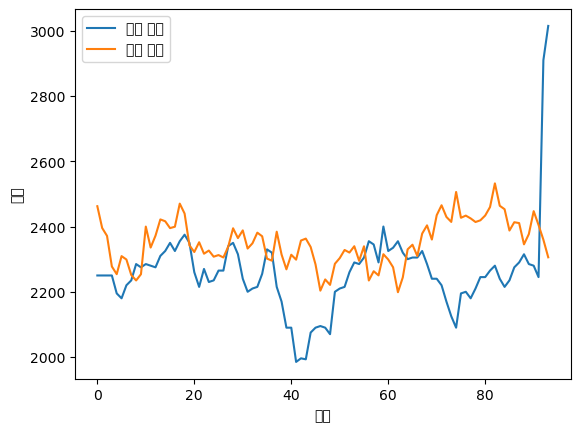

Ridge
RMSE: 169.6334538814434


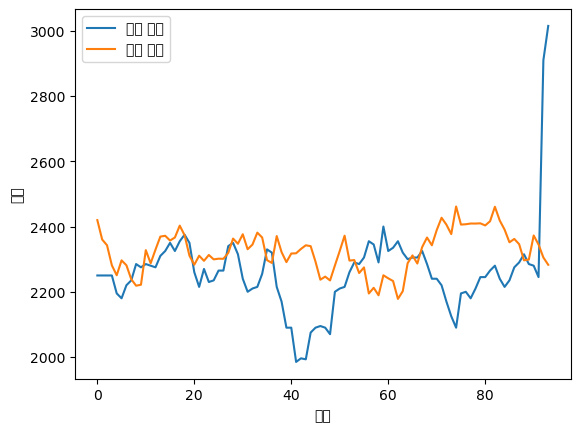

Lasso
RMSE: 877.703557831653


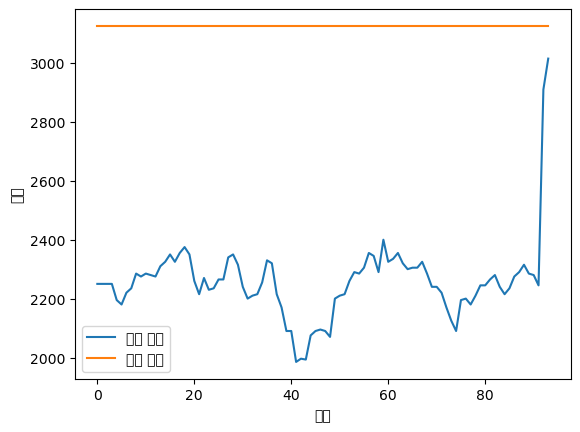

ElasticNet
RMSE: 608.3294090159216


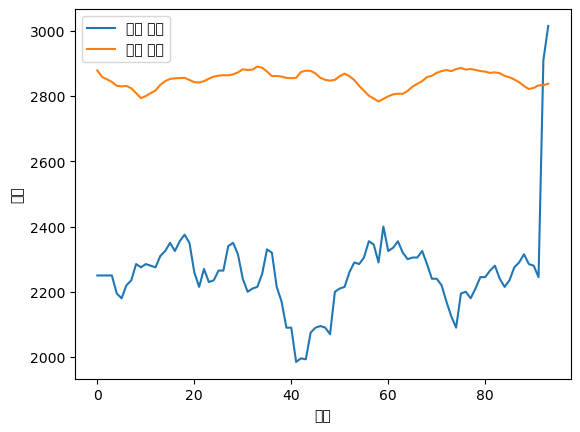

DecisionTreeRegressor
RMSE: 475.86036303350903


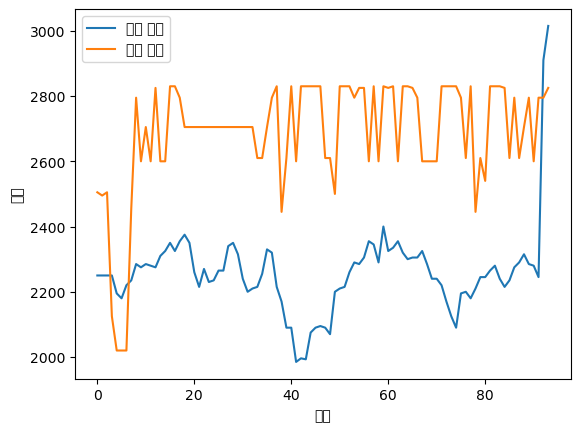

RandomForestRegressor
RMSE: 474.05368947548436


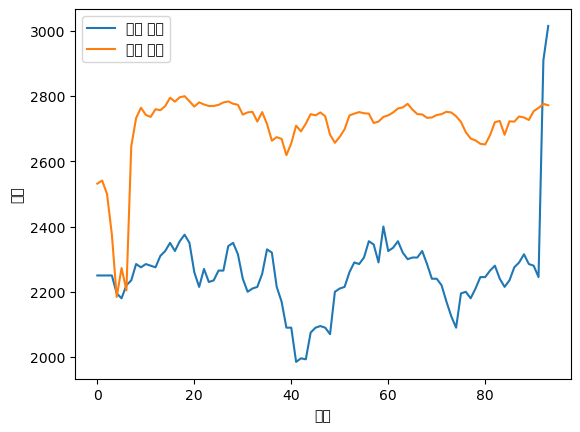

XGBRegressor
RMSE: 477.87858516289344


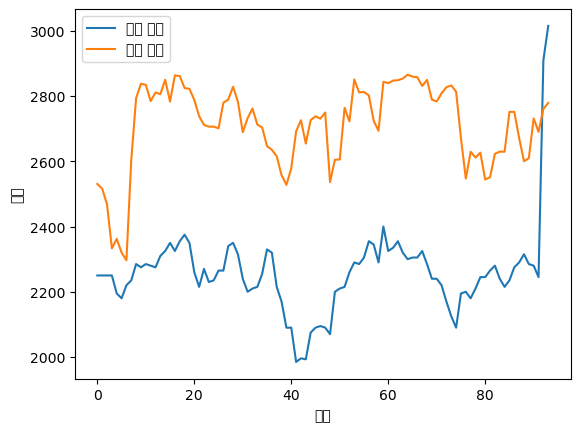

LGBMRegressor
RMSE: 392.4208618464576


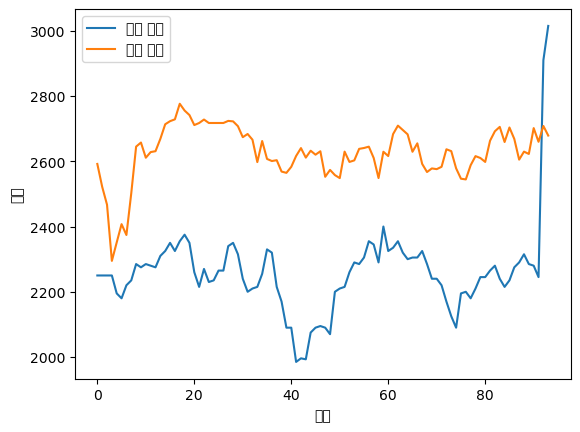

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 주가 데이터에서 사용할 특징 선택
features = ['시가', '고가', '저가', '종가', '거래량']
# df_stock = df_stock.iloc[-100:, :]
# 주가 예측에 사용할 슬라이딩 윈도우 크기
window_size = 10

# 예측 대상의 시간 차 (15일 뒤)
target_offset = 15 - 1

# 슬라이딩 윈도우를 사용하여 특징과 타겟 데이터 생성
X = []
y = []

for i in range(len(df_stock) - window_size - target_offset):
    window = df_stock[features].iloc[i:i+window_size].values  # 배열로 변환
    target = df_stock['종가'].iloc[i+window_size+target_offset]
    X.append(window.flatten())  # 2차원 배열을 1차원으로 변환
    y.append(target)

print(fianl_X)
X = np.array(X)
y = np.array(y)

# 데이터 분할 (학습 데이터와 테스트 데이터)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 특성 표준화# sklarn의 standard scaler를 이용하여 데이터를 정규화한다.
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Random Forest 모델 학습
for model in model_def():
    print(model.__class__.__name__)
    model.fit(X_train_scaled, y_train_scaled)
    # 테스트 데이터로 주가 예측
    predictions_scaled = model.predict(X_test_scaled)

    # 역변환하여 예측 결과 출력
    predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

    # # 예측 결과 출력
    # for i in range(len(predictions)):
    #     print(f"실제 주가: {y_test[i]}, 예측 주가: {predictions[i]}")
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"RMSE: {rmse}")
    import matplotlib.pyplot as plt
    # 실제 주가와 예측 주가를 그래프로 그리기
    plt.plot(y_test, label='실제 주가')
    plt.plot(predictions, label='예측 주가')
    plt.xlabel('시간')
    plt.ylabel('주가')
    plt.legend()
    plt.show()

In [ ]:
df_stock.tail(25)

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
938000,20230421,A060310,3S,126043,2245,2275,2240,2240
940000,20230424,A060310,3S,128222,2245,2270,2230,2240
942000,20230425,A060310,3S,234957,2210,2260,2160,2220
944000,20230426,A060310,3S,134350,2205,2225,2145,2170
946000,20230427,A060310,3S,140528,2160,2170,2100,2125
948000,20230428,A060310,3S,134242,2125,2145,2090,2090
950000,20230502,A060310,3S,144571,2100,2200,2100,2195
952000,20230503,A060310,3S,67412,2195,2220,2175,2200
954000,20230504,A060310,3S,68457,2200,2200,2145,2180
956000,20230508,A060310,3S,64950,2185,2220,2185,2210


In [ ]:
X[-1]

array([  2245,   2275,   2240,   2240, 126043,   2245,   2270,   2230,
         2240, 128222,   2210,   2260,   2160,   2220, 234957,   2205,
         2225,   2145,   2170, 134350,   2160,   2170,   2100,   2125,
       140528,   2125,   2145,   2090,   2090, 134242,   2100,   2200,
         2100,   2195, 144571,   2195,   2220,   2175,   2200,  67412,
         2200,   2200,   2145,   2180,  68457,   2185,   2220,   2185,
         2210,  64950], dtype=int64)

In [ ]:
y[-1]

3015

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

# 추론 결과를 저장하기 위한 dataframe 생성
results_df = pd.DataFrame(columns=['종목코드', 'final_return'])

# train 데이터에 존재하는 독립적인 종목코드 추출
unique_codes = df['종목코드'].unique()

In [ ]:
df['종목코드']

0         A060310
1         A095570
2         A006840
3         A054620
4         A265520
           ...   
987995    A189980
987996    A000540
987997    A003280
987998    A037440
987999    A238490
Name: 종목코드, Length: 988000, dtype: object

In [ ]:
unique_codes = df['종목코드'].unique()

In [ ]:
# KRX 데이터 불러오기

from pykrx import stock

# tickers = stock.get_market_ticker_list(조회일자(YYYYmmdd) [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# name = get_market_ticker_name(심볼 [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# ohlcv = stock.stock.get_market_ohlcv(조회일자(YYYYmmdd) [,앞에 시작일을 넣었다면 종료일] [,심볼] )


# df = stock.get_market_fundamental("20210121", "20220222", "035720")

In [ ]:
code_temp = 'A035720'

In [ ]:
df_stock = df[df['종목코드'] == code_temp]
df_stock = df_stock[df_stock['거래량'] != 0]
df_stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
1537,20210601,A035720,카카오,3573808,123500,127000,123000,127000
3537,20210602,A035720,카카오,2597446,128000,129500,126000,127000
5537,20210603,A035720,카카오,1737466,127500,128500,126000,126500
7537,20210604,A035720,카카오,2668254,126000,126000,123000,124000
9537,20210607,A035720,카카오,1905198,125000,127000,125000,126000
...,...,...,...,...,...,...,...,...
979537,20230523,A035720,카카오,1015317,58100,58200,57600,58000
981537,20230524,A035720,카카오,1258754,57500,57600,56700,56800
983537,20230525,A035720,카카오,1177829,56600,57000,56300,56700
985537,20230526,A035720,카카오,709988,56400,57000,56400,56600


In [ ]:
code_temp[1:] 

'035720'

In [ ]:
df_plus.reset_index(inplace=True)
df_plus

,날짜,PER,PBR,종목코드
0,2021-06-01,344.17,8.89,A035720
1,2021-06-02,344.17,8.89,A035720
2,2021-06-03,342.82,8.85,A035720
3,2021-06-04,336.04,8.68,A035720
4,2021-06-07,341.46,8.82,A035720
...,...,...,...,...
489,2023-05-23,18.67,2.53,A035720
490,2023-05-24,18.29,2.48,A035720
491,2023-05-25,18.25,2.48,A035720
492,2023-05-26,18.22,2.47,A035720


In [ ]:
df_plus = stock.get_market_fundamental("20210601", "20230530", code_temp[1:])
df_plus = df_plus[['PER', 'PBR']]
df_plus['종목코드'] = code_temp
df_plus.reset_index(inplace=True)
df_plus['날짜'] = df_plus['날짜'].astype('str')
df_plus['날짜'] = df_plus['날짜'].str.replace('-', '')
df_plus['날짜'] = df_plus['날짜'].astype('int')
df_plus.columns = ['일자', 'PER', 'PBR', '종목코드']
df_plus

,일자,PER,PBR,종목코드
0,20210601,344.17,8.89,A035720
1,20210602,344.17,8.89,A035720
2,20210603,342.82,8.85,A035720
3,20210604,336.04,8.68,A035720
4,20210607,341.46,8.82,A035720
...,...,...,...,...
489,20230523,18.67,2.53,A035720
490,20230524,18.29,2.48,A035720
491,20230525,18.25,2.48,A035720
492,20230526,18.22,2.47,A035720


In [ ]:
df_total = pd.merge(df_stock, df_plus, on=['일자', '종목코드'], how='left')
df_total

,일자,종목코드,종목명,거래량,시가,고가,저가,종가,PER,PBR
0,20210601,A035720,카카오,3573808,123500,127000,123000,127000,344.17,8.89
1,20210602,A035720,카카오,2597446,128000,129500,126000,127000,344.17,8.89
2,20210603,A035720,카카오,1737466,127500,128500,126000,126500,342.82,8.85
3,20210604,A035720,카카오,2668254,126000,126000,123000,124000,336.04,8.68
4,20210607,A035720,카카오,1905198,125000,127000,125000,126000,341.46,8.82
...,...,...,...,...,...,...,...,...,...,...
489,20230523,A035720,카카오,1015317,58100,58200,57600,58000,18.67,2.53
490,20230524,A035720,카카오,1258754,57500,57600,56700,56800,18.29,2.48
491,20230525,A035720,카카오,1177829,56600,57000,56300,56700,18.25,2.48
492,20230526,A035720,카카오,709988,56400,57000,56400,56600,18.22,2.47


군집화 데이터 추가

In [ ]:
df_cluster = pd.read_csv('./data/X_1st_year.csv', encoding='cp949')
df_cluster

,종목코드,label1,label2,label3,label4
0,A000020,2,4,0,2
1,A000040,2,4,0,2
2,A000050,2,0,0,2
3,A000070,2,4,0,2
4,A000080,2,0,0,2
...,...,...,...,...,...
1995,A375500,2,4,0,2
1996,A378850,2,4,2,0
1997,A383220,0,4,2,2
1998,A383310,0,4,2,0


In [ ]:
df_cluster[df_cluster['종목코드'] == 'A000020'].values[0][1:]

array([2, 4, 0, 2], dtype=object)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# 추론 결과를 저장하기 위한 dataframe 생성
results_df = pd.DataFrame(columns=['종목코드', 'final_return'])


df_cluster = pd.read_csv('./data/X_1st_year.csv', encoding='cp949')

# train 데이터에 존재하는 독립적인 종목코드 추출
unique_codes = df['종목코드'].unique()

features = ['시가', '고가', '저가', '종가', '거래량', 'PER', 'PBR']
# df_stock = df_stock.iloc[-100:, :]
# 주가 예측에 사용할 슬라이딩 윈도우 크기
window_size = 3

# 예측 대상의 시간 차 (15일 뒤)
target_offset = 15 - 1
# except_corp = ['A099520', 'A065560']
except_corp = []
# 각 종목코드에 대해서 모델 학습 및 추론 반복
for code in tqdm(unique_codes):
    try:
        df_plus = stock.get_market_fundamental("20210601", "20230530", code[1:])
        df_plus = df_plus[['PER', 'PBR']]
        df_plus['종목코드'] = code
        df_plus.reset_index(inplace=True)
        df_plus['날짜'] = df_plus['날짜'].astype('str')
        df_plus['날짜'] = df_plus['날짜'].str.replace('-', '')
        df_plus['날짜'] = df_plus['날짜'].astype('int')
        df_plus.columns = ['일자', 'PER', 'PBR', '종목코드']
        df_stock = df[df['종목코드'] == code]
        df_stock = pd.merge(df_stock, df_plus, on=['일자', '종목코드'], how='left')
        df_stock = df_stock[df_stock['거래량'] != 0]
        cluster_info = df_cluster[df_cluster['종목코드'] == code].values[0][1:]
        df_stock = df_stock.dropna()
    except:
        except_corp.append(code)
        continue

    if len(df_stock) < 10:
        except_corp.append(code)
        continue
    prediction_list = []
    
    for target_offset in [0, 14]:
        
        
        # 슬라이딩 윈도우를 사용하여 특징과 타겟 데이터 생성
        X = []
        y = []

        for i in range(len(df_stock) - window_size - target_offset):
            window = df_stock[features].iloc[i:i+window_size].values  # 배열로 변환
            target = df_stock['종가'].iloc[i+window_size+target_offset]
            X.append(np.array(list(window.flatten()) + list(cluster_info)))  # 2차원 배열을 1차원으로 변환
            y.append(target)

        X = np.array(X)
        y = np.array(y)
        fianl_X = df_stock[features].iloc[-window_size:].values 
        fianl_X = np.array(list(fianl_X.flatten()) + list(cluster_info))
 

        # 특성 표준화# sklarn의 standard scaler를 이용하여 데이터를 정규화한다.
        
        # scaler_x = StandardScaler()
        # X_scaled = scaler_x.fit_transform(X)
        # fianl_X_scaled = scaler_x.transform(fianl_X.reshape(1, -1))

        # scaler_y = StandardScaler()
        # y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

        # Random Forest 모델 학습
        model = LinearRegression()
        model.fit(X, y)
        predictions = model.predict(fianl_X.reshape(1, -1))

        # 역변환하여 예측 결과 출력
        # predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))
        prediction_list.append(predictions[0])
    
    # 최종 수익률 계산
    final_return = (prediction_list[1] - prediction_list[0]) / prediction_list[0]
    
    # 결과 저장
    results_df.loc[len(results_df), :] = [code, final_return]


100%|██████████| 2000/2000 [1:55:05<00:00,  3.45s/it]  


In [37]:
for i in range(len(except_corp)):
    results_df.loc[len(results_df), :] = [except_corp[i], 0]
    
results_df

,종목코드,final_return
0,A060310,-0.529521
1,A095570,-0.073868
2,A006840,-0.099801
3,A054620,0.006019
4,A265520,0.032171
...,...,...
1995,A012600,0
1996,A223310,0
1997,A109070,0
1998,A069110,0


In [38]:
results_df['순위'] = results_df['final_return'].rank(method='first', ascending=False).astype('int') # 각 순위를 중복없이 생성
results_df

,종목코드,final_return,순위
0,A060310,-0.529521,1983
1,A095570,-0.073868,1767
2,A006840,-0.099801,1834
3,A054620,0.006019,831
4,A265520,0.032171,528
...,...,...,...
1995,A012600,0,1167
1996,A223310,0,1168
1997,A109070,0,1169
1998,A069110,0,1170


In [39]:
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission

,종목코드,순위
0,A000020,1
1,A000040,2
2,A000050,3
3,A000070,4
4,A000080,5
...,...,...
1995,A375500,1996
1996,A378850,1997
1997,A383220,1998
1998,A383310,1999


In [40]:
try_final_2_submission = sample_submission[['종목코드']].merge(results_df[['종목코드', '순위']], on='종목코드', how='left')
try_final_2_submission

,종목코드,순위
0,A000020,180
1,A000040,914
2,A000050,1022
3,A000070,309
4,A000080,366
...,...,...
1995,A375500,836
1996,A378850,729
1997,A383220,872
1998,A383310,1940


In [41]:
try_final_2_submission.to_csv('try_final_3_submission.csv', index=False)